In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Exploration

In [3]:
data= pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data = data.astype({'oldpeak':'int64'})

In [9]:
data['oldpeak'].unique()

array([2, 3, 1, 0, 4, 6, 5])

# Visualization 

Text(0.5, 0.98, 'resting electrocardiographic results for men and women in different ages')

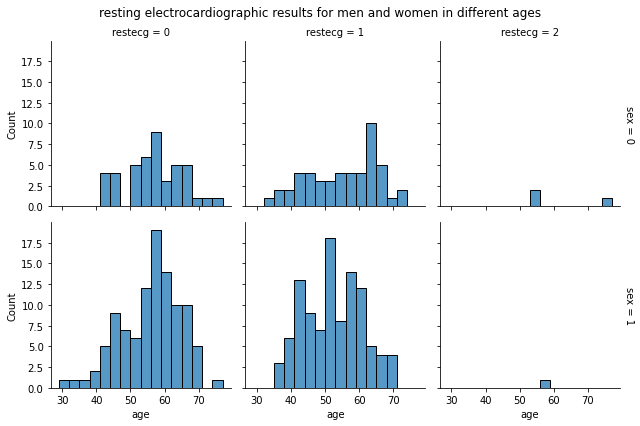

In [10]:
import seaborn as sns
rel=sns.displot(
    data, x="age", col="restecg", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)
rel.fig.subplots_adjust(top=.9)
rel.fig.suptitle('resting electrocardiographic results for men and women in different ages')

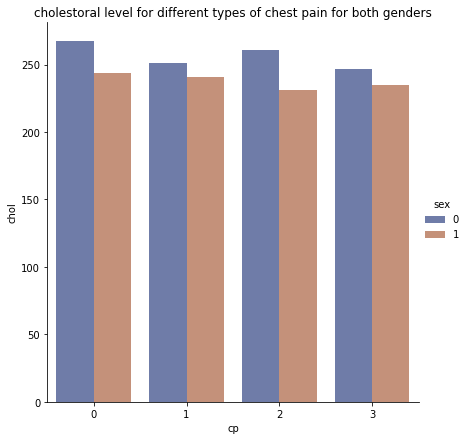

In [11]:
sns.catplot(
    data=data, kind="bar",
    x="cp", y="chol", hue="sex",palette="dark", alpha=.6, height=6, ci=False
).set(title='cholestoral level for different types of chest pain for both genders')

[Text(0.5, 1.0, 'maximum heart rate achieved for resting blood pressure level')]

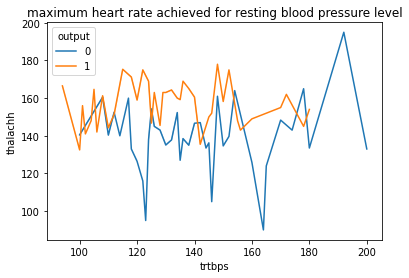

In [12]:
sns.lineplot(data=data, x="trtbps", y="thalachh", hue="output",
             ci=False).set(title='maximum heart rate achieved for resting blood pressure level')

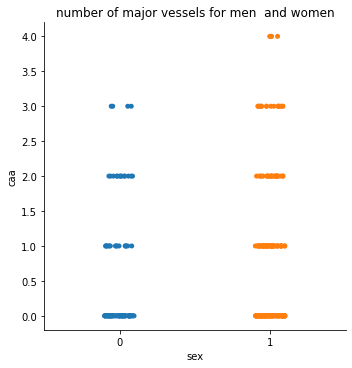

In [13]:
sns.catplot(data=data, x="sex",
            y="caa").set(title='number of major vessels for men  and women')

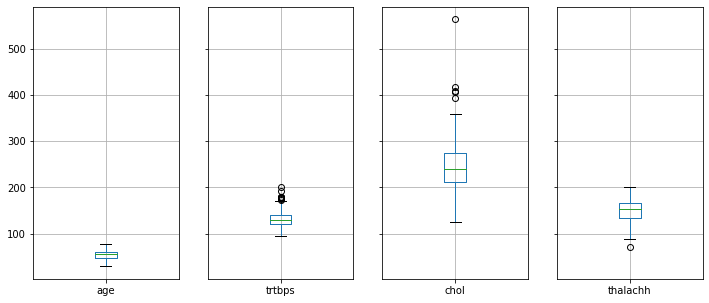

In [14]:
#outliers in numerical features
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12,5))
data.boxplot('age', ax=ax1)
data.boxplot('trtbps', ax=ax2)
data.boxplot('chol', ax=ax3)
data.boxplot('thalachh', ax=ax4)
plt.show()

# Feature extraction

In [15]:
#removing outliers
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    lst = df.index[(df[ft] < lowerBound)|(df[ft] > upperBound)]
    return lst
lst =[]
for ft in ['age']:
    lst.extend(outliers(data,ft))
for ft in ['trtbps']:
    lst.extend(outliers(data,ft))
for ft in ['chol']:
    lst.extend(outliers(data,ft))
for ft in ['thalachh']:
    lst.extend(outliers(data,ft))
#dropping outliers 
data = data.drop(lst)
    

In [16]:
x=data.drop(columns="output", axis=1)
y=data['output']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y,
                                                   random_state=2)

In [18]:
print(x.shape,x_train.shape,x_test.shape)

(288, 13) (230, 13) (58, 13)


# Model 
using SVM and LogisticRegression

In [19]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1,loss='hinge'))   
])
svm_clf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [20]:
lgr_clf = LogisticRegression()
lgr_clf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# Model Evaluation

Support vector machine classifier 

In [21]:
svm_train_pred= svm_clf.predict(x_train)
svm_train_accuracy = accuracy_score(svm_train_pred, y_train)
print(svm_train_accuracy)

0.8652173913043478


In [22]:
svm_test_pred= svm_clf.predict(x_test)
svm_test_accuracy = accuracy_score(svm_test_pred, y_test)
print(svm_test_accuracy)

0.8103448275862069


Logistic regression classifier

In [23]:
lgr_train_pred= lgr_clf.predict(x_train)
lgr_train_accuracy = accuracy_score(lgr_train_pred, y_train)
print(lgr_train_accuracy)

0.8695652173913043


In [24]:
lgr_test_pred = lgr_clf.predict(x_test)
lgr_test_accuracy = accuracy_score(lgr_test_pred, y_test)
print(lgr_test_accuracy)

0.8103448275862069


we can see that LogisticRegression model is doing little bit better in the train set accuracy score

# Predict

In [25]:
prediction_lgr = lgr_clf.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
print(prediction_lgr)

[1]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
